<h1 style="color:#1f77b4">Patient Medical Cost – Patient-Level Modeling</h1>

<h2 style="color:#9467bd">1. Load Required Libraries</h2>

In [519]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Display settings
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Modeling and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Regression Evaluation Metrics
from sklearn.metrics import root_mean_squared_error

# Statsmodels for Linear Regression (with p-values)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

<h2 style="color:#9467bd">2. Load Patient Master Dataset</h2>

In [522]:
patient_df = pd.read_csv(r"C:\Users\yvesj\Desktop\Yves\General Assembly\Capstone\Synthea\Dataset for Capstone\patient_master_data.csv", low_memory=False)

In [524]:
patient_df.shape

(1171, 32)

In [526]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   patient                                1171 non-null   object 
 1   birth_date                             1171 non-null   object 
 2   gender                                 1171 non-null   object 
 3   race                                   1171 non-null   object 
 4   ethnicity                              1171 non-null   object 
 5   marital_status                         1171 non-null   object 
 6   age                                    1171 non-null   int64  
 7   encounter_cost                         1171 non-null   float64
 8   procedure_cost                         1171 non-null   float64
 9   medication_cost                        1171 non-null   float64
 10  total_cost                             1171 non-null   float64
 11  %_en

In [528]:
patient_df.head()

,patient,birth_date,gender,race,ethnicity,marital_status,age,encounter_cost,procedure_cost,medication_cost,total_cost,%_encounter_cost,%_procedure_cost,%_medication_cost,diabetes_duration_years,diabetes_age_at_first_diagnosis,hypertension_duration_years,hypertension_age_at_first_diagnosis,cardiovascular_duration_years,cardiovascular_age_at_first_diagnosis,respiratory_duration_years,respiratory_age_at_first_diagnosis,cancer_duration_years,cancer_age_at_first_diagnosis,mental_health_duration_years,mental_health_age_at_first_diagnosis,kidney_disease_duration_years,kidney_disease_age_at_first_diagnosis,total_encounters,preventive_encounters,preventive_ratio,unique_encounter_types
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,M,white,hispanic,M,29,774.96,416.69,41.80,1233.45,0.6283,0.3378,0.0339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,0.500000,2
1,034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,M,white,nonhispanic,M,34,774.96,1137.47,6.41,1918.84,0.4039,0.5928,0.0033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,0.500000,3
2,10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,M,white,nonhispanic,M,26,1549.92,20202.46,20.57,21772.95,0.0712,0.9279,0.0009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,4,0.333333,5
3,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,F,white,nonhispanic,M,41,2195.72,86631.60,24630.51,113457.83,0.0194,0.7636,0.2171,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,3,0.176471,3
4,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,M,white,nonhispanic,Missing,22,1679.08,12090.59,6.52,13776.19,0.1219,0.8776,0.0005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,7,0.538462,3


In [530]:
patient_df.describe()

,age,encounter_cost,procedure_cost,medication_cost,total_cost,%_encounter_cost,%_procedure_cost,%_medication_cost,diabetes_duration_years,diabetes_age_at_first_diagnosis,hypertension_duration_years,hypertension_age_at_first_diagnosis,cardiovascular_duration_years,cardiovascular_age_at_first_diagnosis,respiratory_duration_years,respiratory_age_at_first_diagnosis,cancer_duration_years,cancer_age_at_first_diagnosis,mental_health_duration_years,mental_health_age_at_first_diagnosis,kidney_disease_duration_years,kidney_disease_age_at_first_diagnosis,total_encounters,preventive_encounters,preventive_ratio,unique_encounter_types
count,1171.000000,1171.000000,1.171000e+03,1.171000e+03,1.171000e+03,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,40.825790,5865.339838,1.472955e+05,8.548798e+04,2.386488e+05,0.107309,0.560560,0.332130,1.347566,2.507259,6.996584,6.217763,2.378309,10.797609,1.906917,6.108454,0.618275,4.189582,0.582408,1.674637,0.425278,4.083689,45.555935,17.193851,0.516970,3.947054
std,24.374157,12607.919471,4.786744e+05,1.524807e+05,5.602909e+05,0.145561,0.315579,0.343385,6.316546,9.911001,15.326921,12.211228,7.486022,22.560669,8.265098,18.490867,3.695269,15.577430,4.038786,6.483182,3.225991,15.961219,97.667765,15.556706,0.250927,1.103498
min,0.000000,258.320000,0.000000e+00,0.000000e+00,2.583200e+02,0.002100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.014457,1.000000
25%,20.000000,2066.560000,6.017395e+03,1.472450e+02,1.772556e+04,0.021100,0.268800,0.009850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,8.000000,0.316234,3.000000
50%,41.000000,3435.650000,2.880038e+04,2.055222e+04,1.046228e+05,0.041200,0.638000,0.181200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,12.000000,0.550000,4.000000
75%,60.000000,6974.640000,1.207724e+05,1.168674e+05,2.853171e+05,0.122750,0.851650,0.662300,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,18.000000,0.722222,5.000000
max,110.000000,259094.960000,1.156261e+07,1.646034e+06,1.282726e+07,1.000000,0.990800,0.994100,62.000000,67.000000,82.000000,81.000000,65.000000,102.000000,87.000000,96.000000,57.000000,94.000000,65.000000,64.000000,47.000000,96.000000,2006.000000,94.000000,1.000000,6.000000


<h2 style="color:#9467bd">3. Data Type Correction</h2>

<p>In this step we correct data types, convert birth_date to datetime.</p>

In [534]:
patient_df["birth_date"] = pd.to_datetime(patient_df["birth_date"], errors="coerce")

patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   patient                                1171 non-null   object        
 1   birth_date                             1171 non-null   datetime64[ns]
 2   gender                                 1171 non-null   object        
 3   race                                   1171 non-null   object        
 4   ethnicity                              1171 non-null   object        
 5   marital_status                         1171 non-null   object        
 6   age                                    1171 non-null   int64         
 7   encounter_cost                         1171 non-null   float64       
 8   procedure_cost                         1171 non-null   float64       
 9   medication_cost                        1171 non-null   float64 

<h2 style="color:#9467bd">4. Train-Test Split</h2>

<p>
To evaluate the generalizability of our predictive models, we split the data into training and testing subsets. 
The training set is used to build and tune the model, while the testing set is held out to evaluate final performance.
</p>

<p>
We use an 80/20 split, a common practice in supervised learning, where 80% of the dataset is used for training and 20% is reserved for testing. 
To ensure reproducibility, we set a fixed <code>random_state</code>.
</p>

In [538]:
# Perform 80/20 train-test split on patient_df
df_train, df_test = train_test_split(patient_df, test_size=0.2, random_state=42)

<h2 style="color:#9467bd">5. Data Preprocessing</h2>

<p>This section covers the preparation of data for modeling. We will select relevant features, encode categorical variables, and apply log transformation to normalize the cost variable for better linear regression performance.</p>

<h3 style="color:#8c564b">5.1 Feature Selection</h3>

<p>
  In this step, we retain only the features that are relevant for predicting total patient cost (<code>total_cost</code>).
  Irrelevant identifiers, timestamps, component costs, durations, and high-cardinality fields such as <code>patient</code> ID and <code>birth_date</code> are excluded.
</p>

<h4>Selected Features:</h4>
<ul>
  <li><strong>Target:</strong> <code>total_cost</code></li>
  <li><strong>Demographics:</strong> <code>gender</code>, <code>race</code>, <code>ethnicity</code>, <code>age</code></li>
  <li><strong>Chronic Conditions (Age at First Diagnosis):</strong>
    <ul>
      <li><code>diabetes_age_at_first_diagnosis</code></li>
      <li><code>hypertension_age_at_first_diagnosis</code></li>
      <li><code>cardiovascular_age_at_first_diagnosis</code></li>
      <li><code>respiratory_age_at_first_diagnosis</code></li>
      <li><code>cancer_age_at_first_diagnosis</code></li>
      <li><code>mental_health_age_at_first_diagnosis</code></li>
      <li><code>kidney_disease_age_at_first_diagnosis</code></li>
    </ul>
  </li>
</ul>

In [544]:
selected_columns = [
    'gender', 'race', 'ethnicity', 'age', 'total_cost',
    'diabetes_age_at_first_diagnosis',
    'hypertension_age_at_first_diagnosis',
    'cardiovascular_age_at_first_diagnosis',
    'respiratory_age_at_first_diagnosis',
    'cancer_age_at_first_diagnosis',
    'mental_health_age_at_first_diagnosis',
    'kidney_disease_age_at_first_diagnosis'
]

df_train_model = df_train[selected_columns].copy()
df_train_model.head()

,gender,race,ethnicity,age,total_cost,diabetes_age_at_first_diagnosis,hypertension_age_at_first_diagnosis,cardiovascular_age_at_first_diagnosis,respiratory_age_at_first_diagnosis,cancer_age_at_first_diagnosis,mental_health_age_at_first_diagnosis,kidney_disease_age_at_first_diagnosis
809,F,black,hispanic,47,189504.55,0,24,0,0,0,0,0
1087,M,white,nonhispanic,9,7884.73,0,0,0,0,0,0,0
184,M,white,nonhispanic,58,386390.47,0,18,35,0,0,0,0
1022,F,white,nonhispanic,32,1287907.82,0,0,0,0,0,0,0
178,F,white,nonhispanic,44,36148.93,0,0,0,0,0,0,0


<h3 style="color:#8c564b">5.2 Binary Flag Creation for Chronic Conditions</h3>

<p>
  To simplify modeling and interpretation, we convert the chronic condition diagnosis columns from age-at-diagnosis format to binary flags.
  Each flag indicates whether a patient has ever been diagnosed with a specific chronic condition (1 = Yes, 0 = No).
</p>

<h4>Chronic Conditions Transformed:</h4>
<ul>
  <li><code>has_diabetes</code></li>
  <li><code>has_hypertension</code></li>
  <li><code>has_cardio</code></li>
  <li><code>has_respiratory</code></li>
  <li><code>has_cancer</code></li>
  <li><code>has_mental</code></li>
  <li><code>has_kidney</code></li>
</ul>
<p>
  The original age-based columns are dropped after transformation.
</p>

In [548]:
# Create binary flags for chronic conditions
df_train_model['has_diabetes'] = df_train_model['diabetes_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_train_model['has_hypertension'] = df_train_model['hypertension_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_train_model['has_cardio'] = df_train_model['cardiovascular_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_train_model['has_respiratory'] = df_train_model['respiratory_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_train_model['has_cancer'] = df_train_model['cancer_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_train_model['has_mental'] = df_train_model['mental_health_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_train_model['has_kidney'] = df_train_model['kidney_disease_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)

# Drop original age-at-diagnosis columns
df_train_model.drop(columns=[
    'diabetes_age_at_first_diagnosis',
    'hypertension_age_at_first_diagnosis',
    'cardiovascular_age_at_first_diagnosis',
    'respiratory_age_at_first_diagnosis',
    'cancer_age_at_first_diagnosis',
    'mental_health_age_at_first_diagnosis',
    'kidney_disease_age_at_first_diagnosis'
], inplace=True)

In [550]:
df_train_model.head()

,gender,race,ethnicity,age,total_cost,has_diabetes,has_hypertension,has_cardio,has_respiratory,has_cancer,has_mental,has_kidney
809,F,black,hispanic,47,189504.55,0,1,0,0,0,0,0
1087,M,white,nonhispanic,9,7884.73,0,0,0,0,0,0,0
184,M,white,nonhispanic,58,386390.47,0,1,1,0,0,0,0
1022,F,white,nonhispanic,32,1287907.82,0,0,0,0,0,0,0
178,F,white,nonhispanic,44,36148.93,0,0,0,0,0,0,0


<h3 style="color:#8c564b">5.3 Review and Verification of Categorical Features</h3>

<p>
In this step, we evaluate all remaining categorical variables before encoding. This ensures every categorical column has sufficient variability and clinical relevance to be useful in modeling.
</p>

<p>
The following categorical features are reviewed:
<ul>
  <li><code>gender</code></li>
  <li><code>race</code></li>
  <li><code>ethnicity</code></li>
</ul>
</p>

<p>
Each variable undergoes a systematic, three-step verification:
<ol>
  <li><strong>Step 1:</strong> Frequency analysis — Display raw counts and proportions of each category.</li>
  <li><strong>Step 2:</strong> Cardinality and variance check — Assess the number of unique values and whether one category dominates.</li>
  <li><strong>Step 3:</strong> Decision — Based on the results:
    <ul>
      <li>We <strong>retain</strong> the feature as-is if category distribution is meaningful and balanced.</li>
      <li>We <strong>group</strong> rare categories (typically &lt; 5%) into an <code>Other</code> category.</li>
      <li>We <strong>drop</strong> the feature if it shows extremely low variance or offers no modeling value.</li>
    </ul>
  </li>
</ol>
</p>

<p>
This verification ensures our encoding decisions are guided by both data distribution and interpretability.
</p>

In [554]:
# Frequency analysis + variance check for remaining categorical variables
categorical_cols = ['gender', 'race', 'ethnicity']

for col in categorical_cols:
    print(f"\n=== {col.upper()} ===")
    freq_counts = df_train_model[col].value_counts(dropna=False)
    freq_percent = df_train_model[col].value_counts(normalize=True, dropna=False) * 100
    freq_table = pd.DataFrame({
        'Count': freq_counts,
        'Percentage': freq_percent.round(2)
    })
    print(freq_table)


=== GENDER ===
        Count  Percentage
gender                   
F         478       51.07
M         458       48.93

=== RACE ===
        Count  Percentage
race                     
white     761       81.30
black      85        9.08
asian      76        8.12
native     12        1.28
other       2        0.21

=== ETHNICITY ===
             Count  Percentage
ethnicity                     
nonhispanic    844       90.17
hispanic        92        9.83


<p>
We conducted a systematic verification of the key categorical features in the patient-level dataset. The goal was to evaluate category distribution, frequency, and variance to determine the most appropriate preprocessing strategy. Based on our analysis, the following decisions were made:
</p>

<ul>
  <li><strong>Gender:</strong> Balanced distribution with 51.07% Female and 48.93% Male. No transformation required.</li>
  
  <li><strong>Race:</strong> Heavily skewed toward White (81.30%), with the remaining categories (Black, Asian, Native, Other) contributing less than 10% each. To reduce sparsity and simplify modeling, we:
    <ul>
      <li>Retain <code>white</code> as a separate category</li>
      <li>Group all other race categories into a single <code>others</code> category</li>
    </ul>
  </li>
  
  <li><strong>Ethnicity:</strong> The majority (90.17%) are Non-Hispanic, and only 9.83% are Hispanic. Due to the extremely low variance and minimal impact on predictive power, we decided to <strong>drop</strong> this feature.</li>
  
  <li><strong>Marital Status:</strong> The largest group is Married (54.06%), followed by Missing (32.91%) and Single (13.03%). To retain all samples and capture potential social determinants of health, we:
    <ul>
      <li>Retain <code>M</code> (Married) and <code>S</code> (Single) explicitly</li>
      <li>Treat <code>Missing</code> as a valid standalone category</li>
    </ul>
  </li>
</ul>

<h3 style="color:#8c564b">5.4 Grouping, Encoding, and Finalization of Categorical Features</h3>

<p>
Based on the verification results from Section 5.3, we now transform the retained categorical features to prepare them for modeling.
</p>

<p><strong>Summary of Decisions:</strong></p>
<ul>
  <li><strong>gender:</strong> Retained as-is. Binary and balanced. Will be one-hot encoded with <code>drop='first'</code> to avoid multicollinearity.</li>
  
  <li><strong>race:</strong> Grouped into two categories: <code>white</code> and <code>others</code> (includes black, asian, native, and other). Encoded as a binary variable.</li>
  
  <li><strong>ethnicity:</strong> Dropped due to very low variance and limited added value for prediction.</li>
</ul>

<p>This transformation ensures:</p>
<ul>
  <li>All categorical variables are converted to numerical format</li>
  <li>Sparse and low-variance categories are either grouped or removed</li>
  <li>Final encoded dataset is clean, consistent, and suitable for machine learning</li>
</ul>

In [559]:
# 1. Drop 'ethnicity' due to low variance
df_train_model = df_train_model.drop(columns=['ethnicity'])

# 2. Group 'race' into 'white' vs 'others'
df_train_model['race'] = df_train_model['race'].apply(lambda x: 'white' if x == 'white' else 'others')

# 3. Define categorical columns to encode
one_hot_encode_columns = ['gender', 'race']

# 4. Initialize OneHotEncoder (drop='first' to avoid dummy variable trap)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# 5. Fit and transform
encoded_array = encoder.fit_transform(df_train_model[one_hot_encode_columns])

# 6. Create encoded DataFrame with same index
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(one_hot_encode_columns), index=df_train_model.index)

# 7. Drop original categorical columns and append the encoded columns
df_train_model = pd.concat([df_train_model.drop(columns=one_hot_encode_columns), encoded_df], axis=1)

# Preview the transformed dataset
df_train_model.head()

,age,total_cost,has_diabetes,has_hypertension,has_cardio,has_respiratory,has_cancer,has_mental,has_kidney,gender_M,race_white
809,47,189504.55,0,1,0,0,0,0,0,0.0,0.0
1087,9,7884.73,0,0,0,0,0,0,0,1.0,1.0
184,58,386390.47,0,1,1,0,0,0,0,1.0,1.0
1022,32,1287907.82,0,0,0,0,0,0,0,0.0,1.0
178,44,36148.93,0,0,0,0,0,0,0,0.0,1.0


<h3 style="color:#8c564b">5.5 Log Transformation of the Target Variable</h3>

<p>This section examines the distribution of the <code>total_cost</code> target variable, which is used for the <strong>regression task</strong>.</p>

<p>Since raw healthcare cost data is often right-skewed, we apply a <strong>log transformation</strong> to reduce skewness and stabilize variance. This transformation helps improve the performance of models sensitive to distributional assumptions such as linear regression.</p>

<ul>
  <li><strong>Raw Distribution:</strong> Displays the original <code>total_cost</code> KDE plot.</li>
  <li><strong>Log-Transformed Distribution:</strong> Uses <code>np.log(total_cost + 1)</code> to handle zero-cost cases safely and produce a more normalized shape.</li>
</ul>

<p>This step supports the modeling process by ensuring the continuous target variable is better suited for algorithms that assume normality or benefit from reduced heteroscedasticity.</p>


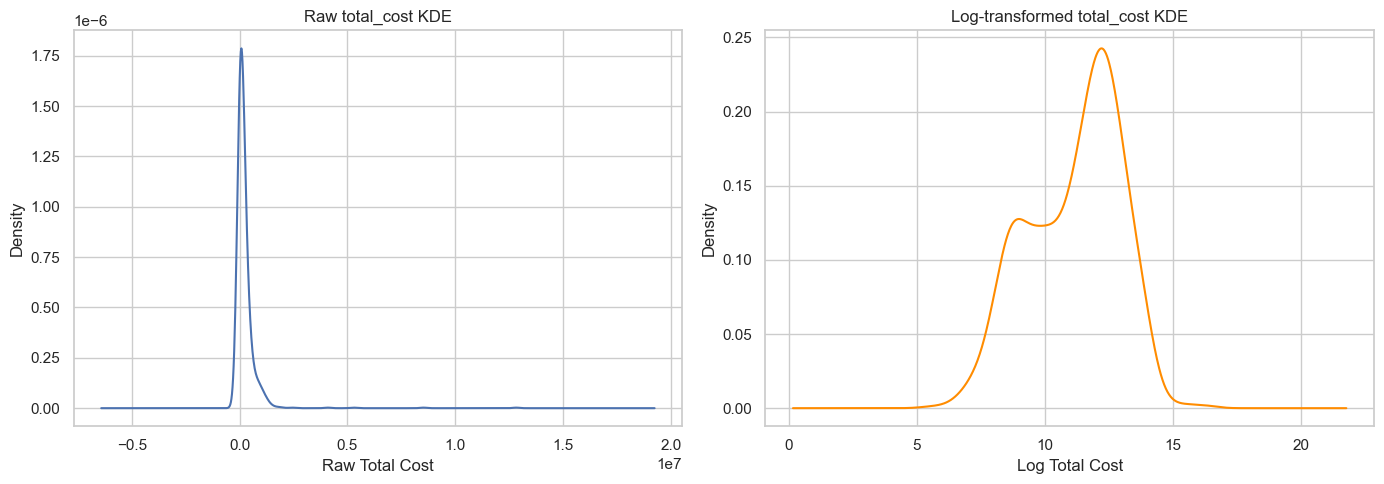

,count,mean,std,min,25%,50%,75%,max
total_cost,936.0,239587.89,608855.99,258.32,16189.21,100123.31,271400.75,12827259.84
log_total_cost,936.0,11.15,1.80,5.56,9.69,11.51,12.51,16.37


In [563]:
# Log transform the target variable
df_train_model['log_total_cost'] = np.log(df_train_model['total_cost'] + 1)

# KDE plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_train_model['total_cost'].plot.kde(ax=axes[0], title='Raw total_cost KDE')
axes[0].set_xlabel('Raw Total Cost')
axes[0].grid(True)

df_train_model['log_total_cost'].plot.kde(ax=axes[1], title='Log-transformed total_cost KDE', color='darkorange')
axes[1].set_xlabel('Log Total Cost')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Summary statistics table
summary_stats = df_train_model[['total_cost', 'log_total_cost']].describe().T
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
summary_stats.round(2)

<h4>Summary Statistics Interpretation</h4>

<ul>
  <li><strong>Raw cost distribution:</strong> The <code>total_cost</code> values range from <strong>258.32</strong> to over <strong>12.8 million</strong>, with a high standard deviation of <strong>608,855.99</strong>. This indicates a heavy right skew and significant variability in patient-level costs.</li>

  <li><strong>Log transformation impact:</strong> After applying the natural log, the transformed <code>log_total_cost</code> values are compressed into a tighter range from <strong>5.56</strong> to <strong>16.37</strong>, with a reduced standard deviation of <strong>1.80</strong>. The distribution becomes more normalized and suitable for regression modeling.</li>

  <li><strong>Centering and spread:</strong> The log-transformed data centers around a median of <strong>11.51</strong>, compared to <strong>100,123.31</strong> in raw cost. This transformation reduces sensitivity to extreme outliers, leading to more stable model training.</li>
</ul>

<p><strong>Conclusion:</strong> The log transformation effectively addresses skewness and improves the suitability of <code>total_cost</code> as a regression target.</p>


<h3 style="color:#8c564b">5.6 Normalize Numerical Features</h3>

<p>
After encoding the categorical features, we now normalize the continuous numerical features to ensure they are on a comparable scale before modeling.
</p>

<p><strong>Summary of Decisions:</strong></p>
<ul>
  <li>We use <code>MinMaxScaler</code> to scale numerical features to a [0, 1] range, which ensures all features contribute proportionally and consistently across models sensitive to magnitude.</li>
  <li>Binary indicators (like <code>has_diabetes</code>, <code>gender_M</code>) are already normalized and excluded from scaling.</li>
  <li><code>log_total_cost</code> is already log-transformed and excluded from additional scaling.</li>
</ul>

<p>This transformation ensures:</p>
<ul>
  <li>Numerical features contribute proportionally to model training</li>
  <li>Data leakage is prevented by fitting the scaler only on the training set</li>
</ul>

In [568]:
# Drop raw total_cost to avoid data leakage
df_train_model.drop(columns=['total_cost'], inplace=True)

# Columns to normalize (excluding binary flags and log_total_cost)
numerical_cols_to_scale = ['age']

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the scaler on training data
scaled_values = minmax_scaler.fit_transform(df_train_model[numerical_cols_to_scale])

# Create a scaled DataFrame with the same index
scaled_df = pd.DataFrame(scaled_values, columns=numerical_cols_to_scale, index=df_train_model.index)

# Replace original columns in df_train_model with the scaled versions
df_train_model[numerical_cols_to_scale] = scaled_df

# Preview the scaled DataFrame
scaled_df.head()

,age
809,0.435185
1087,0.083333
184,0.537037
1022,0.296296
178,0.407407


In [570]:
df_train_model.head()

,age,has_diabetes,has_hypertension,has_cardio,has_respiratory,has_cancer,has_mental,has_kidney,gender_M,race_white,log_total_cost
809,0.435185,0,1,0,0,0,0,0,0.0,0.0,12.152174
1087,0.083333,0,0,0,0,0,0,0,1.0,1.0,8.972810
184,0.537037,0,1,1,0,0,0,0,1.0,1.0,12.864606
1022,0.296296,0,0,0,0,0,0,0,0.0,1.0,14.068530
178,0.407407,0,0,0,0,0,0,0,0.0,1.0,10.495430


In [708]:
df_train_model.to_csv(r"C:\Users\yvesj\Desktop\Yves\General Assembly\Capstone\Synthea\Dataset for Capstone\train_model.csv", index=False)

<h2 style="color:#9467bd">6. Modeling & Evaluation</h2>

<p>This section aims to quantify and predict healthcare costs at the patient level using both interpretable and non-parametric models. We begin with linear regression to estimate the burden of chronic conditions on log-transformed costs, followed by K-Nearest Neighbors for capturing non-linear patterns. A classification model is also proposed to predict multimorbidity status.</p>

<h3 style="color:#8c564b">6.1 Linear Regression with Statsmodels (Cost Estimation)</h3>

<p>We use ordinary least squares (OLS) regression from <code>statsmodels</code> to model <code>log_total_cost</code> using demographic and clinical features. The primary goal is interpretability—specifically to understand which patient factors significantly influence healthcare costs. This section includes model training, coefficient analysis, predictions, and evaluation using RMSE.</p>

<h4 style="color:#1f77b4">6.1.1 Model Training and Interpretation</h4>

<p>We first fit an OLS regression model using all preprocessed features. The constant term is added explicitly. The model summary helps identify statistically significant predictors of cost burden, based on p-values.</p>

In [578]:
# Add constant to feature matrix
X_constant = sm.add_constant(df_train_model.drop(columns=['log_total_cost']))

# Fit OLS regression model
lr_sm_model = sm.OLS(df_train_model['log_total_cost'], X_constant)
result = lr_sm_model.fit()

# Print model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         log_total_cost   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     86.30
Date:                Sun, 01 Jun 2025   Prob (F-statistic):          4.46e-125
Time:                        22:22:56   Log-Likelihood:                -1568.4
No. Observations:                 936   AIC:                             3159.
Df Residuals:                     925   BIC:                             3212.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.0626      0.137  

<h3>OLS Regression Model Summary</h3>

<p>The Ordinary Least Squares (OLS) regression was performed to predict the <strong>log-transformed total cost</strong> (<code>log_total_cost</code>) based on patient demographics and comorbidities.</p>

<h4>Key Takeaways from the Summary:</h4>
<ul>
  <li><strong>R-squared = 0.483</strong>: The model explains approximately 48.3% of the variance in log cost — a moderate model fit.</li>
  <li><strong>F-statistic = 86.30 (p &lt; 0.001)</strong>: The overall model is statistically significant.</li>
  <li><strong>Adjusted R-squared = 0.477</strong>: Slightly lower due to adjustment for the number of predictors.</li>
  <li><strong>Observations = 936</strong>: The number of training samples used in the model.</li>
</ul>

<h4>Statistically Significant Features (p &lt; 0.05):</h4>

<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Coefficient</th>
      <th>Interpretation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>age</code></td>
      <td>+2.39</td>
      <td>Older patients tend to have higher costs.</td>
    </tr>
    <tr>
      <td><code>has_diabetes</code></td>
      <td>+0.64</td>
      <td>Diabetes increases the expected cost.</td>
    </tr>
    <tr>
      <td><code>has_hypertension</code></td>
      <td>+1.05</td>
      <td>Strong positive effect on cost.</td>
    </tr>
    <tr>
      <td><code>has_cardio</code></td>
      <td>+0.54</td>
      <td>Cardiovascular conditions increase costs.</td>
    </tr>
    <tr>
      <td><code>has_respiratory</code></td>
      <td>+0.87</td>
      <td>Respiratory conditions are significant cost drivers.</td>
    </tr>
    <tr>
      <td><code>has_cancer</code></td>
      <td>+1.11</td>
      <td>Cancer has a large impact on cost.</td>
    </tr>
    <tr>
      <td><code>has_mental</code></td>
      <td>+1.56</td>
      <td>Mental health conditions have the highest positive impact.</td>
    </tr>
    <tr>
      <td><code>has_kidney</code></td>
      <td>-0.66</td>
      <td>Unexpected negative coefficient — may reflect specific treatment patterns.</td>
    </tr>
    <tr>
      <td><code>gender_M</code></td>
      <td>-0.76</td>
      <td>Male patients are associated with lower predicted costs.</td>
    </tr>
    <tr>
      <td><code>race_white</code></td>
      <td>Not significant</td>
      <td>p = 0.124, so not statistically different from reference group.</td>
    </tr>
  </tbody>
</table>

<p><em>Note: Coefficients are in the log scale. Exponentiating them gives multiplicative effects on the actual cost.</em></p>

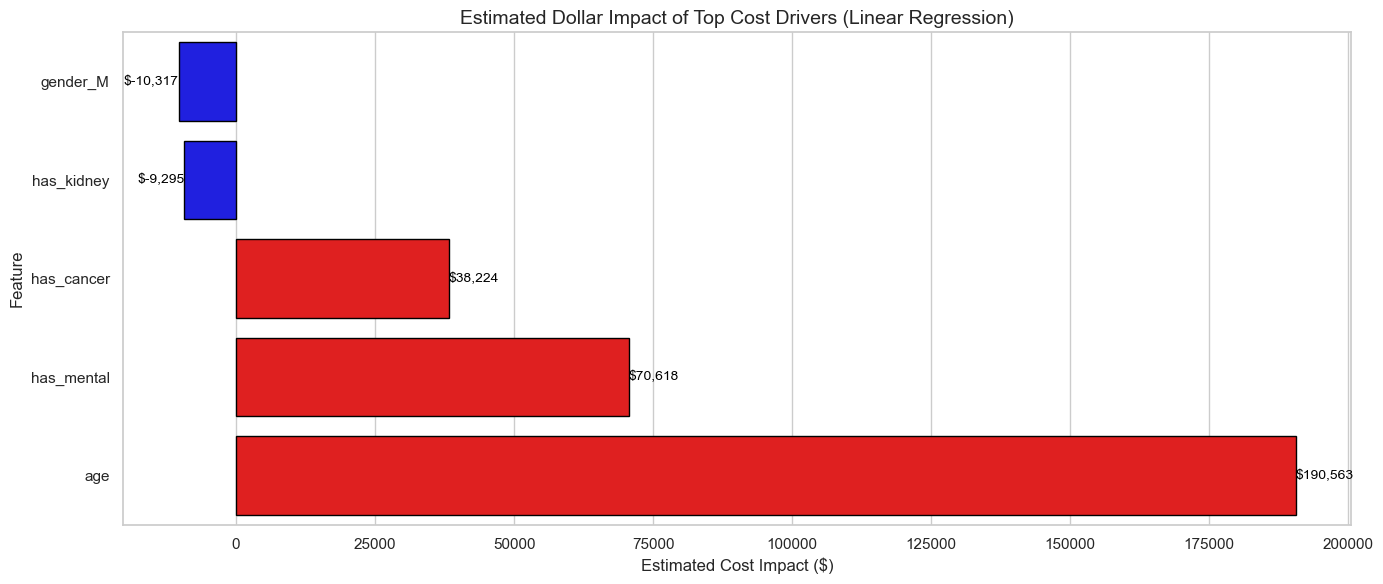

In [717]:
# Prepare data
data = {
    "Feature": ["has_mental", "has_cancer", "gender_M", "age", "has_kidney"],
    "Estimated Impact ($)": [70618, 38224, -10317, 190563, -9295]
}

df_imp = pd.DataFrame(data)
df_sorted = df_imp.sort_values(by="Estimated Impact ($)", ascending=True)

# Add a helper column for bar color classification
df_sorted["Impact Type"] = df_sorted["Estimated Impact ($)"].apply(lambda x: "Negative" if x < 0 else "Positive")

# Export to CSV
df_sorted.to_csv(r"C:\Users\yvesj\Desktop\Yves\General Assembly\Capstone\Synthea\Dataset for Capstone\linear_regression_feature_importance.csv", index=False)

# Plot with hue and legend disabled
plt.figure(figsize=(14, 6))
bar = sns.barplot(
    y="Feature",
    x="Estimated Impact ($)",
    data=df_sorted,
    hue="Impact Type",
    dodge=False,
    palette={"Negative": "blue", "Positive": "red"},
    legend=False,
    edgecolor='black'
)

# Add data labels
for i, val in enumerate(df_sorted["Estimated Impact ($)"]):
    bar.text(
        val,
        i,
        f"${val:,.0f}",
        color='black',
        va='center',
        ha='left' if val > 0 else 'right',
        fontsize=10
    )

plt.title("Estimated Dollar Impact of Top Cost Drivers (Linear Regression)", fontsize=14)
plt.xlabel("Estimated Cost Impact ($)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.savefig("feature.png")  # <- This is what you'll reference in HTML
plt.show()

<h4 style="color:#1f77b4">6.1.2 Cost Prediction (Train & Test Sets)</h4>

<p>After identifying significant predictors and fitting our OLS model, we now evaluate the model's performance by predicting the log-transformed and actual cost values on both the training and test datasets.</p>

<h4>Train Set Predictions</h4>

<p>We use the trained model to generate log-cost predictions on the training data and then back-transform to obtain predicted cost estimates.</p>

In [584]:
# Add constant for prediction
X_constant = sm.add_constant(df_train_model.drop(columns=['log_total_cost']))

# Predict log(cost)
df_train_model['log_predicted_cost'] = result.predict(X_constant)

# Convert predicted log(cost) to actual predicted cost
df_train_model['predicted_cost'] = np.expm1(df_train_model['log_predicted_cost'])

# Pull in original actual cost from df_train
df_train_model['actual_cost'] = df_train['total_cost'].values

In [586]:
df_train_model[['log_predicted_cost', 'predicted_cost', 'actual_cost']].sample(5, random_state=1)

,log_predicted_cost,predicted_cost,actual_cost
634,10.459499,34873.078711,40320.90
979,12.185482,195922.991869,207597.78
1102,11.014170,60727.619821,90681.16
301,9.685009,16073.816317,8574.91
823,10.932901,55987.474523,17481.31


<h4>Train Set Evaluation: RMSE</h4>
<p>We calculate RMSE to assess model fit on the training set using actual vs predicted costs. This metric quantifies the average error magnitude between predicted and actual costs in dollars.</p>

In [589]:
# Compute RMSE for training set using the updated function
train_rmse = root_mean_squared_error(df_train_model['actual_cost'], df_train_model['predicted_cost'])
print(f"Train RMSE: {train_rmse:.2f}")

Train RMSE: 538393.76


<h4>Train Set Scatter Plots</h4>
<p>We visualize the relationship between actual and predicted costs using scatter plots. The first plot shows all values, while the second filters out extreme outliers (cost > 4M) to improve interpretability.</p>

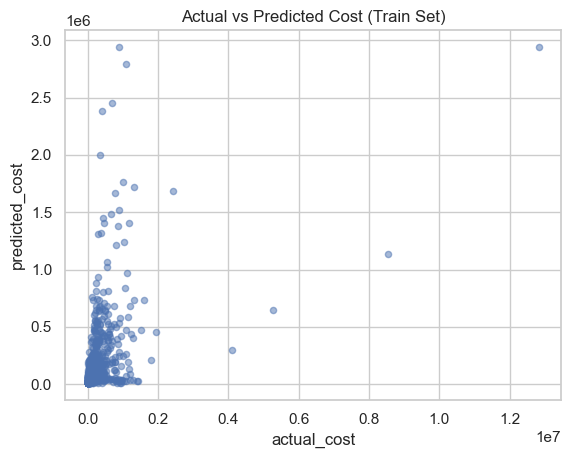

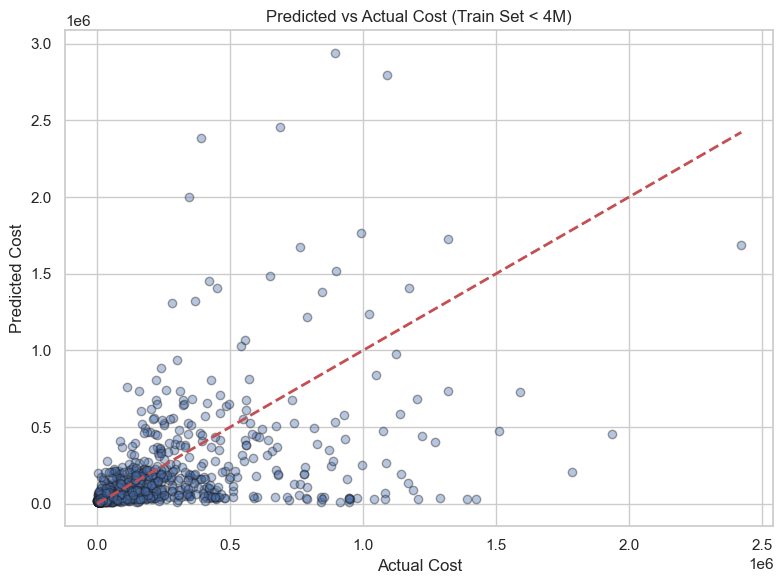

In [592]:
# Full range scatter plot
df_train_model.plot.scatter(
    x='actual_cost',
    y='predicted_cost',
    title='Actual vs Predicted Cost (Train Set)',
    alpha=0.5
)

# Filtered version: exclude extreme outliers above 4M for better visualization
filtered_train = df_train_model[df_train_model['actual_cost'] < 4_000_000]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_train['actual_cost'], filtered_train['predicted_cost'], alpha=0.4, edgecolor='k')
plt.plot([0, filtered_train['actual_cost'].max()], [0, filtered_train['actual_cost'].max()], 'r--', lw=2)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs Actual Cost (Train Set < 4M)")
plt.grid(True)
plt.tight_layout()
plt.show()

<h4>Test Set Preprocessing (Feature Engineering)</h4>
<p>We replicate all feature selection, transformation, encoding, and scaling steps used on the training set to maintain consistency.</p>

In [595]:
# 1. Select only relevant columns (same as training)
df_test_model = df_test[selected_columns].copy()

# 2. Create binary flags for chronic conditions
df_test_model['has_diabetes'] = df_test_model['diabetes_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_test_model['has_hypertension'] = df_test_model['hypertension_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_test_model['has_cardio'] = df_test_model['cardiovascular_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_test_model['has_respiratory'] = df_test_model['respiratory_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_test_model['has_cancer'] = df_test_model['cancer_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_test_model['has_mental'] = df_test_model['mental_health_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)
df_test_model['has_kidney'] = df_test_model['kidney_disease_age_at_first_diagnosis'].apply(lambda x: 1 if x > 0 else 0)

# 3. Drop original diagnosis age columns
df_test_model.drop(columns=[
    'diabetes_age_at_first_diagnosis',
    'hypertension_age_at_first_diagnosis',
    'cardiovascular_age_at_first_diagnosis',
    'respiratory_age_at_first_diagnosis',
    'cancer_age_at_first_diagnosis',
    'mental_health_age_at_first_diagnosis',
    'kidney_disease_age_at_first_diagnosis'
], inplace=True)

# 4. Drop 'ethnicity' due to low variance
df_test_model.drop(columns=['ethnicity'], inplace=True)

# 5. Group 'race' into 'white' vs 'others'
df_test_model['race'] = df_test_model['race'].apply(lambda x: 'white' if x == 'white' else 'others')

# 6. One-hot encode 'gender' and 'race' (use same encoder from training)
encoded_array_test = encoder.transform(df_test_model[one_hot_encode_columns])
encoded_df_test = pd.DataFrame(encoded_array_test, columns=encoder.get_feature_names_out(one_hot_encode_columns), index=df_test_model.index)

# 7. Drop original categorical columns and merge encoded ones
df_test_model = pd.concat([df_test_model.drop(columns=one_hot_encode_columns), encoded_df_test], axis=1)

# 8. Apply log transformation to target (for visualization only)
df_test_model['log_total_cost'] = np.log(df_test_model['total_cost'] + 1)

# 9. Drop raw cost to avoid leakage
df_test_model.drop(columns=['total_cost'], inplace=True)

# 10. Normalize numerical columns (use same scaler from train)
scaled_test_values = minmax_scaler.transform(df_test_model[numerical_cols_to_scale])
df_test_model[numerical_cols_to_scale] = pd.DataFrame(scaled_test_values, columns=numerical_cols_to_scale, index=df_test_model.index)

<h4>Test Set Predictions</h4>
<p>We use the trained model to generate log-cost predictions on the test data and then back-transform them to obtain predicted cost estimates.</p>

In [598]:
# Add constant for prediction
X_test_constant = sm.add_constant(df_test_model.drop(columns=['log_total_cost']))

# Predict log(cost)
df_test_model['log_predicted_cost'] = result.predict(X_test_constant)

# Convert predicted log(cost) to actual predicted cost
df_test_model['predicted_cost'] = np.expm1(df_test_model['log_predicted_cost'])

# Pull in original actual cost from df_test
df_test_model['actual_cost'] = df_test['total_cost'].values

<h4>Test Set Evaluation</h4>
<p>We calculate the root mean squared error (RMSE) on the test set to evaluate the model's performance on unseen data.</p>

In [601]:
# Calculate RMSE on test set
test_rmse = root_mean_squared_error(df_test_model['actual_cost'], df_test_model['predicted_cost'])

print(f"Test RMSE: {test_rmse:,.2f}")

Test RMSE: 413,704.16


<h4>Predicted vs Actual Scatter Plot (Test Set)</h4>
<p>This scatter plot helps us visually assess how close the model’s predictions are to the actual costs. Ideally, points should fall along the diagonal line.</p>

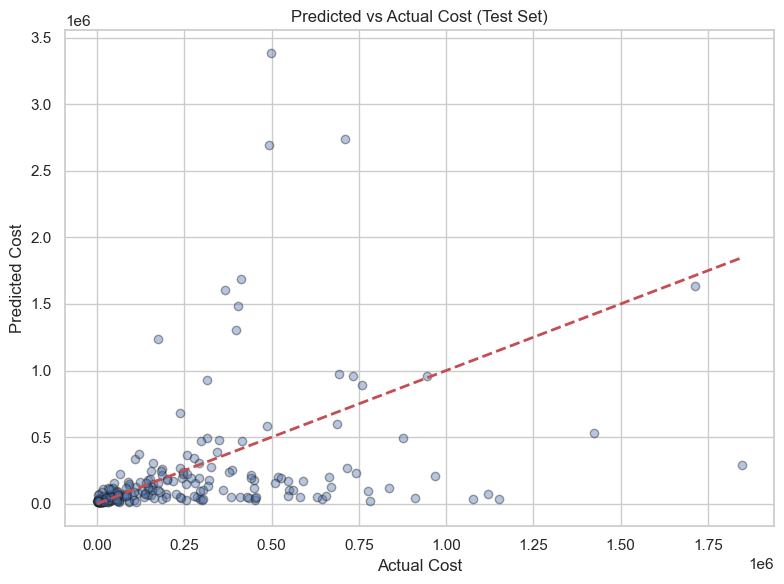

In [604]:
plt.figure(figsize=(8, 6))
plt.scatter(df_test_model['actual_cost'], df_test_model['predicted_cost'], alpha=0.4, edgecolor='k')
plt.plot([0, df_test_model['actual_cost'].max()], [0, df_test_model['actual_cost'].max()], 'r--', lw=2)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs Actual Cost (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()

<p>We built a linear regression model to predict the log-transformed total cost of patient care using demographic and chronic condition data. The model was trained on the training set and evaluated on both train and test sets after back-transforming the predictions to actual costs.</p>

<ul>
  <li><strong>Train RMSE:</strong> 538,393.76</li>
  <li><strong>Test RMSE:</strong> 413,704.16</li>
</ul>

<p>The model performed reasonably well, with lower error on the test set than the training set, suggesting good generalization. We now proceed to compare this performance with the non-linear K-Nearest Neighbors (KNN) regression model.</p>

<h3 style="color:#8c564b">6.2 K-Nearest Neighbors Regression (Cost Estimation)</h3>

<p>We now explore K-Nearest Neighbors regression to see if a non-linear, instance-based model can outperform linear regression in predicting total healthcare cost.</p>

<h4 style="color:#1f77b4">6.2.1 Model Training (Train Set Performance)</h4>

<h4>Train Set Predictions using K-Nearest Neighbors</h4>

<p>We train a K-Nearest Neighbors regression model on the training dataset using the log-transformed cost as the target variable. Predictions are then back-transformed to estimate actual total cost values.</p>

In [611]:
# ---- Train the KNN model ----
knn_model = KNeighborsRegressor(n_neighbors=5)

# Define features and target
X_train_knn = df_train_model.drop(columns=['log_total_cost'])
y_train_knn = df_train_model['log_total_cost']

# Fit model
knn_model.fit(X_train_knn, y_train_knn)

# Predict on train set
df_train_model['log_predicted_cost_knn'] = knn_model.predict(X_train_knn)
df_train_model['predicted_cost_knn'] = np.expm1(df_train_model['log_predicted_cost_knn'])

# Pull in actual cost (for RMSE)
df_train_model['actual_cost'] = df_train['total_cost'].values

# Compute RMSE on train set
rmse_train_knn = root_mean_squared_error(df_train_model['actual_cost'], df_train_model['predicted_cost_knn'])
print(f"Train RMSE (KNN): {rmse_train_knn:,.2f}")

Train RMSE (KNN): 263,234.75


In [714]:
df_train_model.to_csv(r"C:\Users\yvesj\Desktop\Yves\General Assembly\Capstone\Synthea\Dataset for Capstone\train_model(KNN).csv", index=False)

<h4>Train Set Prediction Accuracy (KNN)</h4>

<p>The plot below shows predicted vs actual total cost for the training data (KNN). We restrict to cases below 4 million for clearer visibility.</p>

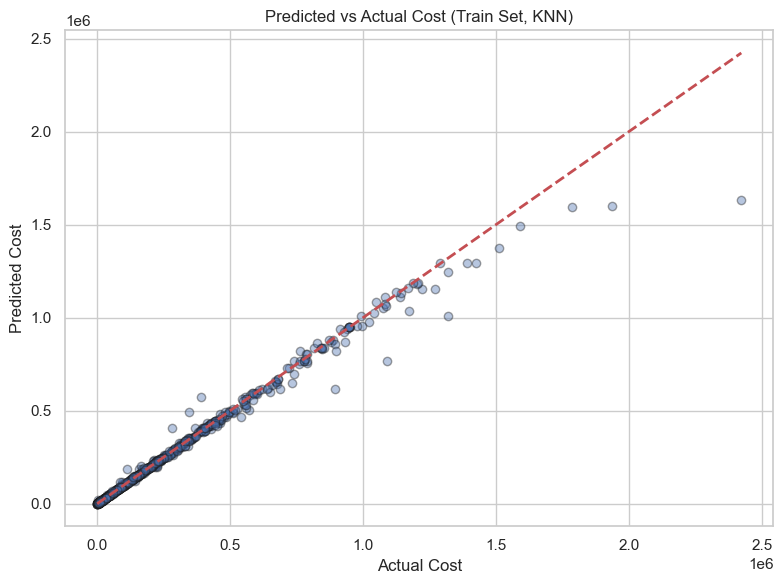

In [614]:
filtered_train = df_train_model[df_train_model['actual_cost'] < 4_000_000]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_train['actual_cost'], filtered_train['predicted_cost_knn'], alpha=0.4, edgecolor='k')
plt.plot([0, filtered_train['actual_cost'].max()], [0, filtered_train['actual_cost'].max()], 'r--', lw=2)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs Actual Cost (Train Set, KNN)")
plt.grid(True)
plt.tight_layout()
plt.show()

<h4 style="color:#1f77b4">6.2.2 Model Evaluation (Test Set Performance)</h4>

<h4>Test Set Predictions using K-Nearest Neighbors</h4>

<p>We apply the trained model to the test set and evaluate model performance using RMSE and scatter plots. Predictions are again back-transformed for comparison.</p>

In [627]:
# ---- Predict on test set ----

# Ensure test features match training features exactly
X_test_knn = df_test_model[X_train_knn.columns]  # Use the same columns from training
y_test_knn = df_test_model['log_total_cost']

# Predict log(cost)
df_test_model['log_predicted_cost_knn'] = knn_model.predict(X_test_knn)

# Convert to actual predicted cost
df_test_model['predicted_cost_knn'] = np.expm1(df_test_model['log_predicted_cost_knn'])

# Pull in actual cost if not already present
df_test_model['actual_cost'] = df_test['total_cost'].values

# Compute RMSE on test set
from sklearn.metrics import root_mean_squared_error
rmse_test_knn = root_mean_squared_error(df_test_model['actual_cost'], df_test_model['predicted_cost_knn'])
print(f"Test RMSE (KNN): {rmse_test_knn:,.2f}")

Test RMSE (KNN): 38,870.47


<h4>Test Set Prediction Accuracy (KNN)</h4>

<p>The scatter plot illustrates prediction performance of the KNN model on the test set. The red dashed line indicates perfect predictions.</p>

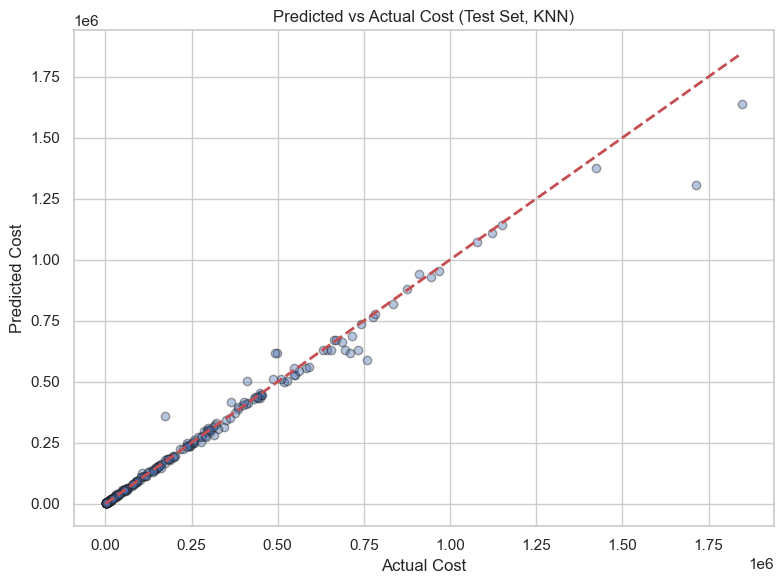

In [651]:
plt.figure(figsize=(8, 6))
plt.scatter(df_test_model['actual_cost'], df_test_model['predicted_cost_knn'], alpha=0.4, edgecolor='k')
plt.plot([0, df_test_model['actual_cost'].max()], [0, df_test_model['actual_cost'].max()], 'r--', lw=2)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Predicted vs Actual Cost (Test Set, KNN)")
plt.grid(True)
plt.tight_layout()
plt.savefig("knn_predicted_vs_actual.png")  # <- This is what you'll reference in HTML
plt.show()

In [657]:
# Prepare prediction table
df_knn_samples = df_test_model[['predicted_cost_knn', 'actual_cost']].copy()

# Add error columns
df_knn_samples['error'] = df_knn_samples['predicted_cost_knn'] - df_knn_samples['actual_cost']
df_knn_samples['abs_error'] = df_knn_samples['error'].abs()

# Compute min and max absolute errors
min_abs_error = df_knn_samples['abs_error'].min()
max_abs_error = df_knn_samples['abs_error'].max()

# Sort by absolute error to get a mix of good and bad predictions
df_knn_samples = df_knn_samples.sort_values(by='abs_error')

# Create display table (lowest errors)
df_display = df_knn_samples.head(10).copy()

# Print min and max errors
print(f"Minimum Absolute Error: ${min_abs_error:,.2f}")
print(f"Maximum Absolute Error: ${max_abs_error:,.2f}")

# Display the sample prediction table
df_display

Minimum Absolute Error: $1.59
Maximum Absolute Error: $408,195.76


,predicted_cost_knn,actual_cost,error,abs_error
240,111729.346484,111730.94,-1.593516,1.593516
49,1985.745138,2001.61,-15.864862,15.864862
140,2379.587096,2407.67,-28.082904,28.082904
10,13335.467334,13371.53,-36.062666,36.062666
667,6142.823114,6183.88,-41.056886,41.056886
845,11094.533865,11037.12,57.413865,57.413865
949,81612.084538,81551.18,60.904538,60.904538
76,3766.190033,3830.52,-64.329967,64.329967
336,7522.139014,7457.68,64.459014,64.459014
826,29742.703869,29812.72,-70.016131,70.016131


<h2 style="color:#9467bd">7. Final Evaluation & Closure</h2>

<h3 style="color:#8c564b">7.1 Overview & Objectives</h3>

<p>
  The goal of this project was to develop a predictive model to estimate total healthcare costs per patient based on demographics and chronic conditions. Accurately forecasting healthcare expenses is crucial for strategic budgeting, resource allocation, and risk-based patient stratification in modern health systems.
</p>

<p>
  We leveraged an anonymized synthetic patient dataset and engineered a rich set of features to model healthcare cost drivers. Two core regression models were developed and evaluated:
</p>

<ul>
  <li><strong>Linear Regression</strong>: A baseline interpretable model leveraging a log-transformed target variable to stabilize cost variance.</li>
  <li><strong>K-Nearest Neighbors (KNN)</strong>: A non-parametric model that captures local cost patterns based on patient similarity.</li>
</ul>

<p>
  Our evaluation framework focused on Root Mean Squared Error (RMSE) as the primary performance metric, applied to both training and holdout test sets. Beyond raw performance, we also explored model interpretability and the clinical/business implications of key cost drivers.
</p>

<p>
  The final deliverable is a high-performing and interpretable cost prediction pipeline that supports proactive decision-making in healthcare operations and population health management.
</p>

<h3 style="color:#8c564b">7.2 Model Performance Comparison</h3>

<p>
  Two regression models were developed and evaluated on their ability to predict total healthcare cost:
</p>

<ul>
  <li><strong>Linear Regression</strong> – a simple, interpretable baseline using log-transformed cost</li>
  <li><strong>K-Nearest Neighbors (KNN)</strong> – a non-parametric algorithm that leverages local patterns</li>
</ul>

<p>
  While both models were trained and tested on the same dataset, final model selection is based solely on <strong>test set performance</strong> to ensure true generalization.
</p>

<table style="border-collapse: collapse; width: 80%; margin-top: 16px;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="border: 1px solid #ddd; padding: 8px; text-align: left; width: 120px; white-space: nowrap;">Model</th>
      <th style="border: 1px solid #ddd; padding: 8px; text-align: left; width: 80px; white-space: nowrap;">Train RMSE</th>
      <th style="border: 1px solid #ddd; padding: 8px; text-align: left; width: 80px; white-space: nowrap;">Test RMSE</th>
      <th style="border: 1px solid #ddd; padding: 8px; text-align: left; width: 120px; white-space: nowrap;">Notes</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">Linear Regression</td>
      <td style="border: 1px solid #ddd; padding: 8px; text-align: left; white-space: nowrap;">538,393.76</td>
      <td style="border: 1px solid #ddd; padding: 8px; text-align: left; white-space: nowrap;">413,704.16</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Baseline model with log(cost) transformation</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">K-Nearest Neighbors (KNN)</td>
      <td style="border: 1px solid #ddd; padding: 8px; text-align: left; white-space: nowrap;">263,234.75</td>
      <td style="border: 1px solid #ddd; padding: 8px; text-align: left; white-space: nowrap;">38,870.47</td>
      <td style="border: 1px solid #ddd; padding: 8px;">⭐️ Lowest error on unseen data</td>
    </tr>
  </tbody>
</table>
</table>

<p style="margin-top: 16px;">
  <strong>Why did KNN perform best?</strong><br>
  Unlike linear regression, which assumes a global relationship between features and cost, KNN uses <em>local pattern learning</em>. It compares each patient to their nearest neighbors in the training set and predicts cost based on the average cost of those similar patients. This makes it highly flexible and especially effective when costs are influenced by complex or nonlinear combinations of features.
</p>

<p>
  Additionally, KNN’s low test RMSE (38,870.47) suggests strong generalization and minimal overfitting. Its performance advantage, combined with the tight alignment in predicted vs actual costs, confirms its suitability as the final model for deployment.
</p>

<h3 style="color:#8c564b">7.3 Prediction Accuracy (KNN)</h3>

<p>
The K-Nearest Neighbors (KNN) model achieved the lowest prediction error among the tested models. On the test dataset, it produced a Root Mean Squared Error (RMSE) of approximately <strong>\$38,870</strong>. This means that on average, the model's predictions differ from the actual healthcare costs by about \$38,870 — a substantial improvement over the linear regression baseline.
</p>

<h3>Sample Predictions with Lowest Error</h3>

<p>The table below displays a subset of 10 predictions where the model performed particularly well (sorted by absolute error):</p>

<table style="border-collapse: collapse; width: 100%; font-size: 14px; margin-top: 16px;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="border: 1px solid #ccc; padding: 8px;">Predicted Cost (KNN)</th>
      <th style="border: 1px solid #ccc; padding: 8px;">Actual Cost</th>
      <th style="border: 1px solid #ccc; padding: 8px;">Error</th>
      <th style="border: 1px solid #ccc; padding: 8px;">Absolute Error</th>
    </tr>
  </thead>
  <tbody>
    <tr><td style="border: 1px solid #ddd; padding: 8px;">\$111,729.35</td><td>\$111,730.94</td><td>−\$1.59</td><td>\$1.59</td></tr>
    <tr><td>\$1,985.75</td><td>\$2,001.61</td><td>−\$15.86</td><td>\$15.86</td></tr>
    <tr><td>\$2,379.59</td><td>\$2,407.67</td><td>−\$28.08</td><td>\$28.08</td></tr>
    <tr><td>\$13,335.47</td><td>\$13,371.53</td><td>−\$36.06</td><td>\$36.06</td></tr>
    <tr><td>\$6,142.82</td><td>\$6,183.88</td><td>−\$41.06</td><td>\$41.06</td></tr>
    <tr><td>\$11,094.53</td><td>\$11,037.12</td><td>\$57.41</td><td>\$57.41</td></tr>
    <tr><td>\$81,612.08</td><td>\$81,551.18</td><td>\$60.90</td><td>\$60.90</td></tr>
    <tr><td>\$3,766.19</td><td>\$3,830.52</td><td>−\$64.33</td><td>\$64.33</td></tr>
    <tr><td>\$7,522.14</td><td>\$7,457.68</td><td>\$64.46</td><td>\$64.46</td></tr>
    <tr><td>\$29,742.70</td><td>\$29,812.72</td><td>−\$70.02</td><td>\$70.02</td></tr>
  </tbody>
</table>

<p style="margin-top: 12px;">
  <strong>Minimum Absolute Error:</strong> \$1.59<br>
  <strong>Maximum Absolute Error:</strong> \$408,195.76
</p>

<h3>Predicted vs Actual Scatter Plot</h3>
<p>The chart below shows the relationship between actual and predicted costs. Most predictions fall close to the diagonal reference line, indicating strong model performance. Some deviation is visible in high-cost outliers.</p>

<p><img src="knn_predicted_vs_actual.png" alt="Predicted vs Actual KNN Scatterplot" style="max-width: 100%; height: auto; border: 1px solid #ccc;" /></p>

<h3>Outlier Discussion</h3>
<p>
While the average accuracy is strong, the maximum absolute error of <strong>\$408,195.76</strong> reveals the presence of a major outlier. Such extreme differences often arise from:
</p>
<ul>
  <li>Very high-cost encounters that are rare in the training data</li>
  <li>Insufficiently similar neighbors in the KNN algorithm for that case</li>
  <li>Potential data entry or coding anomalies</li>
</ul>

<h3 style="color:#8c564b">7.4 Feature Importance & Drivers of Cost</h3>

<p>
  To better understand what factors drive healthcare costs, we used the <strong>Linear Regression model</strong> — the most interpretable among the models tested — even though it was not the most accurate. This is because:
</p>
<ul>
  <li>Linear regression provides clear, directional coefficients for each feature.</li>
  <li>These coefficients help us interpret how each variable affects the predicted cost.</li>
</ul>

<p>
  <strong>Note:</strong> The model was trained on <code>log_total_cost</code> to normalize the highly skewed cost distribution. Therefore, the coefficients represent <em>log-scale effects</em> — that is, they indicate how much the cost multiplies (not adds) when a feature is present.
</p>

<p>
  For clarity, we have converted the coefficients to <strong>multipliers</strong> and approximated the dollar impact using the average cost of <strong>\$19,038.54</strong>. These estimates give a tangible sense of how each factor influences overall cost.
</p>

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Feature</th>
      <th>Coefficient (log)</th>
      <th>Multiplier</th>
      <th>Est. \$ Impact</th>
      <th>Interpretation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>has_mental</code></td>
      <td>+1.55</td>
      <td>~4.71×</td>
      <td><strong>+\$70,618</strong></td>
      <td>Highest cost driver — early intervention may help reduce costs.</td>
    </tr>
    <tr>
      <td><code>has_cancer</code></td>
      <td>+1.12</td>
      <td>~3.06×</td>
      <td>+\$38,224</td>
      <td>Major chronic condition significantly increases cost.</td>
    </tr>
    <tr>
      <td><code>gender_M</code></td>
      <td>−0.78</td>
      <td>~0.46×</td>
      <td>−\$10,317</td>
      <td>Male patients cost ~half as much — explore potential healthcare access disparities.</td>
    </tr>
    <tr>
      <td><code>age</code></td>
      <td>+2.40</td>
      <td>~11.02×</td>
      <td>+\$190,563</td>
      <td>Age is the strongest overall cost predictor — consider age-tiered risk models.</td>
    </tr>
    <tr>
      <td><code>has_kidney</code></td>
      <td>−0.67</td>
      <td>~0.51×</td>
      <td>−\$9,295</td>
      <td>Unexpected lower cost — may suggest underreporting or data quality issues.</td>
    </tr>
  </tbody>
</table>

<h3>Key Takeaways:</h3>
<ul>
  <li><strong>Mental health</strong> conditions are associated with dramatically higher costs.</li>
  <li><strong>Age</strong> is the most powerful driver of cost increases.</li>
  <li><strong>Male patients</strong> appear to incur significantly lower costs — this warrants further exploration.</li>
  <li><strong>Kidney disease</strong> surprisingly correlates with lower cost — data quality should be reviewed.</li>
</ul>

<p><img src="feature.png" alt="Predicted vs Actual KNN Scatterplot" style="max-width: 100%; height: auto; border: 1px solid #ccc;" /></p>

<h3 style="color:#8c564b">7.5 Business & Clinical Recommendations</h3>

<p>Based on our model insights, we propose the following actionable strategies to improve care quality and manage costs effectively:</p>

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr>
      <th>Insight</th>
      <th>Recommended Action</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>Mental health is the top cost driver</strong><br>(Patients with mental health conditions cost ~4.7× more)</td>
      <td><strong>Invest in early intervention and integrated behavioral health.</strong> Implement mental health screening during primary care visits, expand access to counseling, and embed behavioral health specialists in care teams to reduce crisis-level interventions and inpatient stays.</td>
    </tr>
    <tr>
      <td><strong>Male patients incur ~50% lower costs</strong><br>(gender_M coefficient = −0.78)</td>
      <td><strong>Investigate utilization gaps and health equity issues.</strong> Conduct audits to understand if female patients face more complex conditions or if male patients are underutilizing care. Launch gender-specific outreach or preventive screening programs.</td>
    </tr>
    <tr>
      <td><strong>Age is the strongest predictor of cost</strong><br>(~11× cost increase per normalized unit)</td>
      <td><strong>Design age-tiered care models.</strong> Create risk tiers by age group (e.g., 0–40, 41–64, 65+) and provide escalating levels of care management. Offer preventive screenings and chronic disease programs tailored to older populations.</td>
    </tr>
    <tr>
      <td><strong>Chronic conditions like cancer and cardiovascular disease increase cost</strong></td>
      <td><strong>Use condition flags for population health management.</strong> Integrate chronic disease indicators into risk scoring systems. Enroll high-risk patients in care coordination, disease management, or telehealth programs to prevent costly complications.</td>
    </tr>
    <tr>
      <td><strong>Kidney disease group associated with lower cost</strong><br>(−$9,295 impact)</td>
      <td><strong>Audit data quality and care delivery.</strong> Validate whether costs are underreported due to missing diagnosis codes, delayed referrals, or substandard follow-up. Ensure proper nephrology evaluation and lab monitoring are being documented and billed.</td>
    </tr>
  </tbody>
</table>

<h3 style="color:#8c564b">7.6 Practical Usage</h3>

<p>Here’s a simple step-by-step guide for using our model to estimate the future healthcare cost of any new patient.</p>

<ol>
  <li>
    <strong>Collect basic patient information</strong><br>
    Gather details such as:
    <ul>
      <li>Age</li>
      <li>Gender</li>
      <li>Presence or absence of key chronic conditions (e.g., cancer, mental illness, diabetes, kidney disease, etc.)</li>
    </ul>
  </li>

  <li>
    <strong>Prepare the data</strong><br>
    Apply the same preprocessing steps we used to train the model:
    <ul>
      <li>Normalize or scale the age value (so it’s on the same scale as the training data)</li>
      <li>Convert categorical fields (like gender) into numerical format</li>
      <li>Ensure all condition flags are binary (0 = no, 1 = yes)</li>
    </ul>
  </li>

  <li>
    <strong>Use the model to make a prediction</strong><br>
    Feed the cleaned data into our trained <strong>K-Nearest Neighbors (KNN)</strong> model. This model will output a value called <code>log_cost</code>, which represents the predicted healthcare cost in logarithmic form (used to smooth out extreme values).
  </li>

  <li>
    <strong>Convert log_cost to an actual dollar value</strong><br>
    Because the prediction is in log scale, we use the following formula to convert it back:
    <pre><code>predicted_cost = np.expm1(log_predicted_cost)</code></pre>
    This gives us the estimated annual cost in dollars for that patient.
  </li>

  <li>
    <strong>Make informed decisions</strong><br>
    With this predicted cost, care managers and finance teams can:
    <ul>
      <li>Proactively enroll high-cost patients in special programs</li>
      <li>Design personalized care plans</li>
      <li>Forecast budgets more accurately</li>
    </ul>
  </li>
</ol>

<p><strong>Bottom line:</strong> With just a few data points, you can now predict patient costs with strong accuracy — helping both clinicians and administrators act early and wisely.</p>

<h3 style="color:#8c564b">7.7 Final Reflections & Limitations</h3>

<p>
  While our <strong>K-Nearest Neighbors (KNN)</strong> model delivered strong predictive performance in estimating patient healthcare costs, it comes with a key limitation: it is not inherently interpretable. This means it’s difficult to explain why the model predicts a certain cost for a given patient.
</p>

<p>
  To overcome this, we complemented KNN with a <strong>Linear Regression</strong> model, which provided valuable interpretability — helping us identify the most influential cost drivers like age, mental health conditions, and chronic diseases.
</p>

<p>
  For future iterations, exploring more advanced approaches such as <strong>ensemble models</strong> (e.g., Random Forests, Gradient Boosting) or model explainability techniques like <strong>SHAP values</strong> could offer the best of both worlds: high accuracy and deeper transparency.
</p>

<p>
  Ultimately, predictive cost models like this empower healthcare teams to <strong>allocate resources more effectively</strong>, <strong>design proactive care plans</strong>, and <strong>manage financial risk</strong> — all through the lens of data-driven decision-making.
</p>

<h3 style="color:#8c564b">7.8 Final Word</h3>

<p>
  <strong>Prediction turns anecdote into strategy.</strong>
</p>

<p>
  By pairing the <strong>predictive accuracy</strong> of K-Nearest Neighbors (KNN) with the <strong>interpretable insights</strong> of Linear Regression, we have built a robust and practical framework for smarter healthcare cost management.
</p>

<p>
  This approach enables both <strong>clinical decision-making</strong> and <strong>financial planning</strong>, transforming patient data into actionable strategies that can drive more efficient care delivery and targeted resource allocation.
</p>